## **Exploratory Data Analysis**

**Data description:**

The dataset consists of 12,330 sessions. \
The data set was formed in such a way that each session belongs to different users for 1 year. \
The dataset consists of 10 numerical and 8 categorical attributes. \
The `Revenue` attribute is the class label.

Here is a basic data analysis aimed at:

- data quality analysis
- data recovery (elimination of omissions)
- analysis and, if necessary, elimination of anomalies in the data
- identification of the most influential features for subsequent training of the most understandable ML model for business

****

**Описание данных:**

Набор данных состоит из 12 330 наблюдений. \
Набор данных был сформирован таким образом, что каждая сессия принадлежит разным пользователям в течение 1 года. \
Набор данных состоит из 10 числовых и 8 категориальных атрибутов. \
Атрибут `Доход` - это метка класса.

Здесь приведен базовый анализ данных, направленный на:

- анализ качества данных
- восстановление данных (устранение пропусков)
- анализ и, при необходимости, устранение аномалий в данных
- определение наиболее влиятельных прищнаков для последующего обучения наиболее понятной для бизнеса модели ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. General data analysis**

- Checked the size of the table, the number of columns, the number and causes  of NaN's in the columns.

**Общее исследование данных:**

- Проверены размер таблицы, число столбцов, количество и причины пропусков в столбцах.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_education/data/online_shoppers_intention.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
pd.Series(df.isna().sum()/len(df)*100)[df.isna().sum()/len(df)*100 > 0]

Informational_Duration     1.613950
ProductRelated_Duration    3.982157
ExitRates                  0.802920
dtype: float64

In [ ]:
df[df['Informational_Duration'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
19,0,0.0,0,NaN,20,2981.166667,0.0,0.010000,0.0,0.0,Feb,2,4,4,4,Returning_Visitor,False,False
130,0,0.0,0,NaN,2,222.000000,0.0,0.100000,0.0,0.0,Feb,2,6,1,2,Returning_Visitor,True,False
134,6,111.5,0,NaN,26,449.027778,0.0,0.018519,0.0,0.6,Feb,1,1,3,3,Returning_Visitor,False,False


In [ ]:
df[df['ProductRelated_Duration'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
30,0,0.0,0,0.0,2,NaN,0.000000,NaN,0.0,0.0,Feb,1,1,6,3,Returning_Visitor,False,False
35,0,0.0,0,0.0,52,NaN,0.015385,0.020353,0.0,0.0,Feb,2,2,7,1,Returning_Visitor,False,False
107,0,0.0,0,0.0,12,NaN,0.050000,0.066667,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False


In [ ]:
df[df['ExitRates'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8,0,0.0,0,0.0,2,37.0,0.000000,NaN,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
30,0,0.0,0,0.0,2,NaN,0.000000,NaN,0.0,0.0,Feb,1,1,6,3,Returning_Visitor,False,False
83,0,0.0,0,0.0,12,375.0,0.016667,NaN,0.0,0.0,Feb,3,2,4,1,Returning_Visitor,False,False


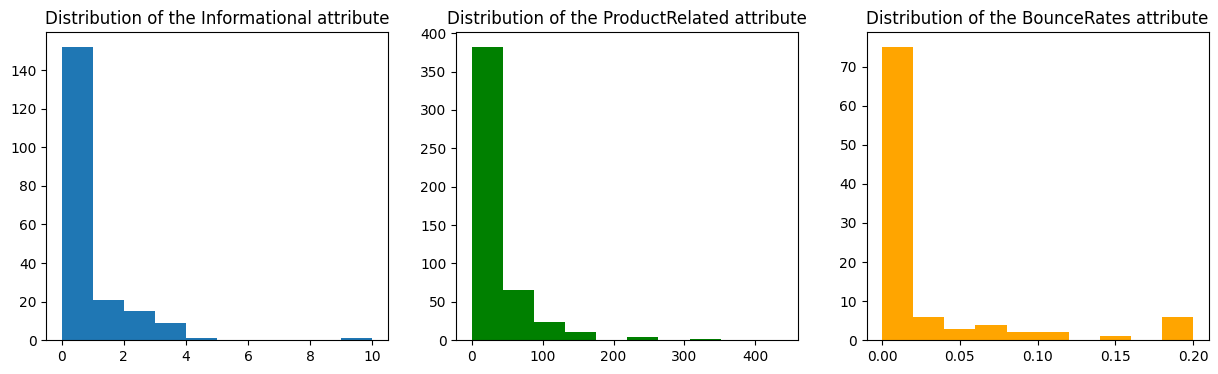

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df[df['Informational_Duration'].isna() == True]['Informational'])
ax1.set_title(f'Distribution of the Informational attribute')

ax2.hist(df[df['ProductRelated_Duration'].isna() == True]['ProductRelated'], color='green')
ax2.set_title(f'Distribution of the ProductRelated attribute')

ax3.hist(df[df['ExitRates'].isna() == True]['BounceRates'], color='orange')
ax3.set_title(f'Distribution of the BounceRates attribute')

figure.set_figheight(4)
figure.set_figwidth(15)
plt.show()

**Table size:** 12330x18 (it was clearly possible to look at the `df.shape` method)\
**Data gaps:** there are three columns. A review of the related columns shows that:
- for the Informational_Duration attribute, omissions may be due to the fact that this section of pages has not been visited,
- for the ExitRates attribute, omissions may be associated with low BounceRate,
- for the ProductRelated_Duration attribute, omissions looks like errors in data

**It was decided** to remove the omissions, since they make up only 4% of the maximum incomplete column.

Next, we analyzed how much information this deletion took away, in general, from the target variable.
****
**Размер таблицы:** 12330x18, явно можно было посмотреть методов `df.shape` \
**Пропуски в данных:** есть в трех столбцах. Рассмотрение связанных с ними столбцов показывает, что:
- для признака Informational_Duration пропуски могут быть связаны с тем, что данная секция страниц не посещалась,
- для признака ExitRates пропуски могут быть связаны с тем, что выход не улавливался,
- для признака ProductRelated_Duration пропуски похожи на ошибки в данных

**Принято решение**  удалить пропуски, поскольку они составляют только 4% от по максимально неполному столбцу.

Дальше проанализировано, сколько это удаление унесло информации, в общем и из целевой переменной.  

In [ ]:
n_samples_before = df.shape[0]
n_true_class_before = df['Revenue'].value_counts()[1]
n_negative_class_before = df['Revenue'].value_counts()[0]

df.dropna(inplace=True)

n_samples_after = df.shape[0]
n_true_class_after = df['Revenue'].value_counts()[1]
n_negative_class_after = df['Revenue'].value_counts()[0]

print(f'Потеряно {100 - n_samples_after/n_samples_before*100} % данных')
print(f'Потеряно {n_true_class_before - n_true_class_after} наблюдений меньшего класса')
print(f'Потеряно {n_negative_class_before - n_negative_class_after} наблюдений большего класса')

Потеряно 6.285482562854824 % данных
Потеряно 138 наблюдений меньшего класса
Потеряно 637 наблюдений большего класса


In [ ]:
print(f'Потеряно {(1 - n_true_class_after/n_true_class_before)*100} % наблюдений меньшего класса')
print(f'Потеряно {(1 - n_negative_class_after/n_negative_class_before)*100} % наблюдений большего класса')

Потеряно 7.232704402515722 % наблюдений меньшего класса
Потеряно 6.112070619842635 % наблюдений большего класса


**Conclusion:**

Comparable percentages were lost in both classes, therefore the deletion was taken as the final preprocessing of the omissions. Further, some data types have been changed for further work with the correct data format.

****
**Вывод:**

В обоих классах потеряны сопоставимые проценты, следовательно удаление принято за итоговую предобработку пропусков. Дальше изменены некоторые типы данных для дальнейшей работы с корректным форматом данных.

In [ ]:
df.Revenue = df.Revenue.astype(int)
df.Weekend = df.Weekend.astype(int)

df.VisitorType = pd.Series(pd.factorize(df.VisitorType)[0], dtype="category")
df.Month = pd.Series(pd.factorize(df.Month)[0], dtype="category")

## **2. Single-factors analysis**
In this block, the columns are divided into categorical (nomial) and quantitative. The distribution is estimated for each column. The relationship of data between each other is considered using statistical coefficients for assessing the relationship.

`Administrative`, `Administrative_Duration`, `Informational`,
`Informational_Duration`, `ProductRelated`, `ProductRelated_Duration` , `BounceRates`, `ExitRates`, `PageValues`,`SpecialDay` —   numeric variables

`Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`,`VisitorType`, `Weekend`,`Revenue`— nomial variables

****

**Однофакторный анализ** \
В данном блоке столбцы разделены на категориальные (номиальные) и количественные. По каждому столбцу оценено распределение. Рассмотрена связь данных между друг другом при помощи статистических коэффициентов оценки взаимосвязи.


`Administrative`, `Administrative_Duration`, `Informational`,
`Informational_Duration`, `ProductRelated`, `ProductRelated_Duration` , `BounceRates`, `ExitRates`, `PageValues`,`SpecialDay` —  числовые  переменные

`Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`,`VisitorType`, `Weekend`,`Revenue`— номиальные переменные


In [ ]:
categorical_features = ['Revenue', 'Weekend', 'VisitorType', 'TrafficType', 'Region', 'Browser', 'OperatingSystems', 'Month']
continuous_feutures = list(set(df.columns) - set(categorical_features))

**Evaluation of distributions of continuous features and their relationship to the target variable.**
****
**Оценка распределений непрерывных признаков и их связи с целевой переменной.**

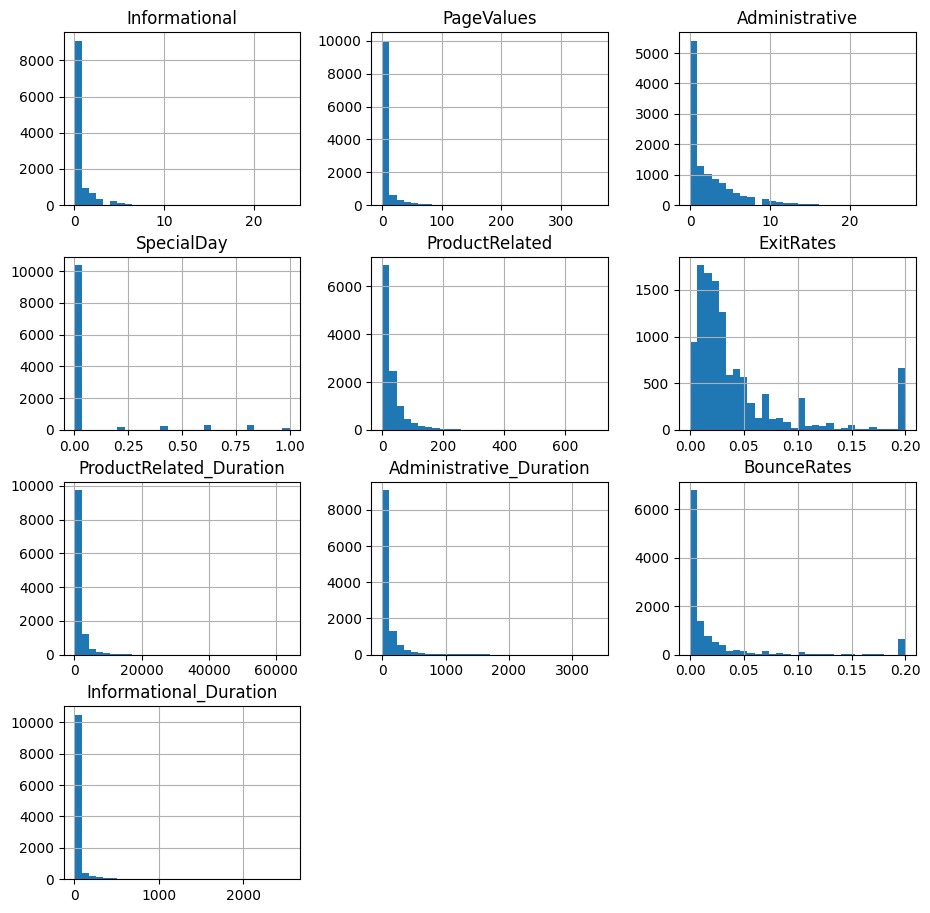

In [ ]:
df.hist(column=continuous_feutures, figsize=(11, 11), bins=30); #distributions

**Conclusion about distributions** \
All signs are distributed with a slope to the right, the concentration of values is about zero. \
Judging by the scale, there are outliers in the variables.

****

**Вывод о распределениях** \
Все признаки распределены со скосом вправо, концентрация значений около нуля. \
Судя по масштабам, в переменных есть выбросы.

**2.1. Evaluation of the relationship of distributions of continuous features between each other.**

To apply the Pearson correlation, the data is scaled, since the Pearson test is based on the assumption of a normal distribution of features.

****

**Оценка взаимосвязи распределений непрерывных признаков между друг-другом.**

Для применения корреляции Пирсона данные масштабированы, так как тест Пирcона основан на предположении о нормальном распределении признаков.

In [ ]:

pirson_correlation_map = np.log(df[continuous_feutures]).corr()
spearman_correlation_map = df[continuous_feutures].corr('spearman')

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: >

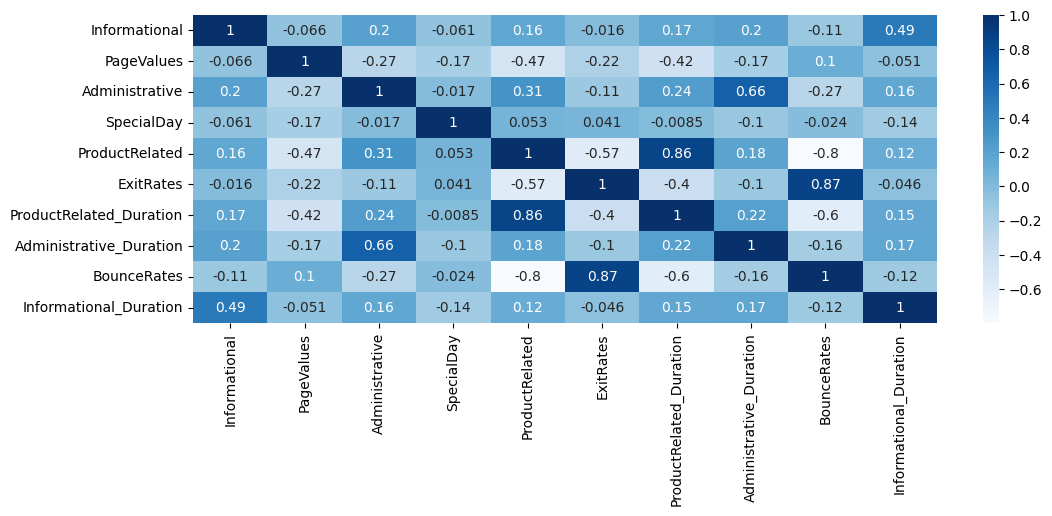

In [ ]:
fig = plt.figure(figsize=(12, 4))
sns.heatmap(pirson_correlation_map, annot=True, cmap='Blues')

<Axes: >

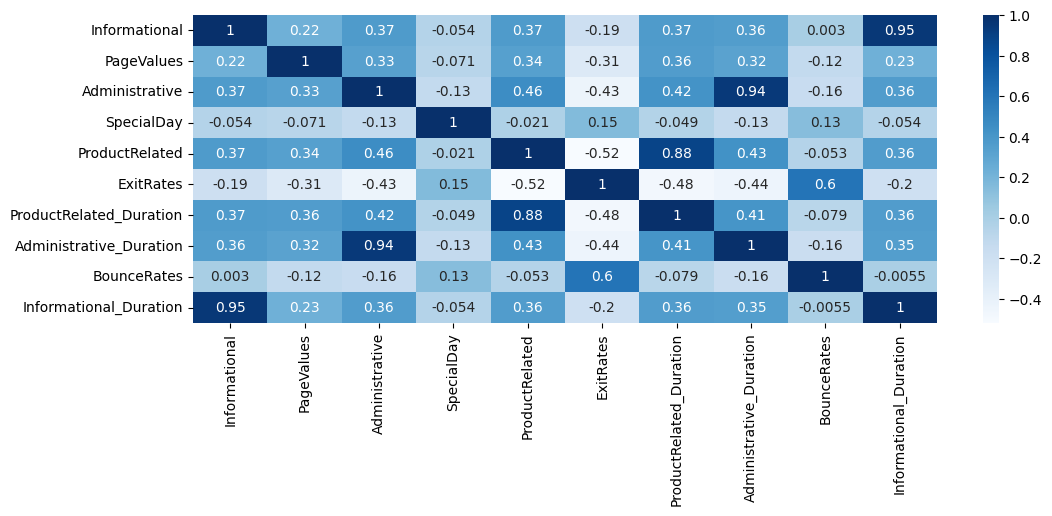

In [ ]:
fig = plt.figure(figsize=(12, 4))
sns.heatmap(spearman_correlation_map, annot=True, cmap='Blues')

**Conclusion about the relationships of numerical variables:**

1. Variables with the number of pages and the duration of stay on these pages are aggregated. Correlation values greater than 0.6 are observed for both Pearson (linear coupling) and Spearman (linear coupling, monotonic coupling).
2. There is also a high linear and monotonic greater than average relationship for the variables Bounce Rates and Exit Rates.

****

**Вывод о взаимосвязях численных переменных:**

1.  Переменные с количеством страниц и длительностью пребывания на этих страницах сколерированы. Наблюдаются значения корреляции больше 0.6 как Пирсона (линейная связь), так и Спирмена (линейная связь, монотонная связь).
2. Также наблюдается высокая линейная и монотонная больше средней связи для переменных Bounce Rates и Exit Rates.

<ipython-input-18-6e43805812b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall_corr = df[categorical_features].corr('kendall')


<Axes: >

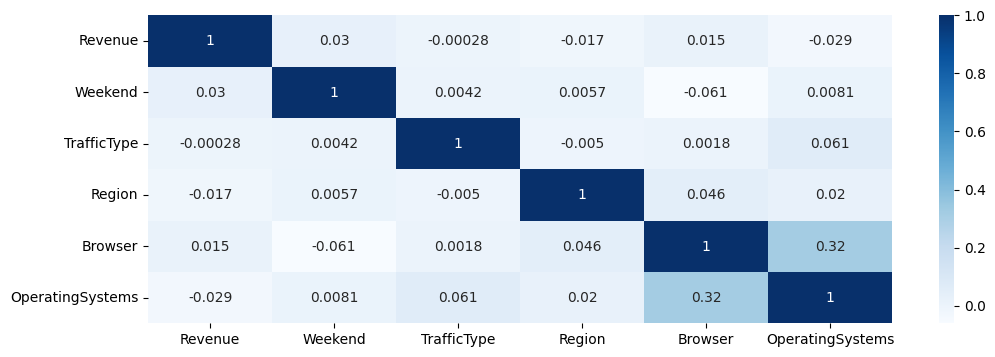

In [ ]:
fig = plt.figure(figsize=(12, 4))
kendall_corr = df[categorical_features].corr('kendall')
sns.heatmap(kendall_corr, annot=True, cmap='Blues')

**Conclusion about the relationships of numerical variables:**
1. For nomial signs, there is no strong relationship between each other, except for some connection between the browser type and the OS used.

****

**Вывод о взаимосвязях численных переменных:**
1. Для номиальных признаков сильной взаимосвязи друг между другом не наблюдается, кроме некоторой связи типа браузера и используемой ОС.

## **3. Target attribute analysis**

In this block, the target attribute and its relationship with the available factors in the data are considered.

****

**Анализ целевого признака**

В данном блоке рассмотрен целевой признак и его взаимосвязь с имеющимися факторами в данных.

In [ ]:
df['Revenue'].value_counts()

0    9785
1    1770
Name: Revenue, dtype: int64

**Conclusion:** \
The data is unbalanced, where 0 is the class of absence of payment, 1 is the class of revenue availability. The target variable is ditochomic (expressed by two classes).

****

**Вывод:** \
Данные дисбалансированы, где 0 класс отсутствия вырочки, 1 класс наличия выручки. Целевая переменная является дитохомической (выраженной двумя классами).

**3.1. The relationship of the target attribute with the quantitative variable.** \
The evaluation of point-biserial correlation (point—biserial correlation) is applied to assess the relationship between a quantitative variable and a dichotomous qualitative variable.

****

**Взаимосвязь целевого признака с количественной переменной.** \
Применена оценка точечно-бисериальной корреляции (point-biserial correlation) — для оценки взаимосвязи между количественной переменной и дихотомической качественной переменной.

In [ ]:
from scipy.stats import pointbiserialr

for i in df[continuous_feutures]:

  corrcoef = pointbiserialr(df[i].fillna(0), df['Revenue'])[0]
  print(f'Связь переменной {i} с целевой переменной', round(corrcoef, 3))

Связь переменной ProductRelated_Duration с целевой переменной 0.152
Связь переменной ExitRates с целевой переменной -0.205
Связь переменной PageValues с целевой переменной 0.5
Связь переменной SpecialDay с целевой переменной -0.083
Связь переменной BounceRates с целевой переменной -0.149
Связь переменной Administrative_Duration с целевой переменной 0.092
Связь переменной Informational с целевой переменной 0.094
Связь переменной ProductRelated с целевой переменной 0.158
Связь переменной Informational_Duration с целевой переменной 0.071
Связь переменной Administrative с целевой переменной 0.138


**Conclusion:**

The coefficient did not reveal strong correlations. Let's look at the distributions over the two observation groups using the Mann-Whitney criterion. This is a statistical criterion used to assess the differences between two independent samples by the level of a quantitative trait.

****

**Вывод:**

Сильных взаимосвязей коэффициентом не выявлено. Посмотрим на распределения по двум группам наблюдения при помощи критерий Манна-Уитни. Это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню количественного признака.

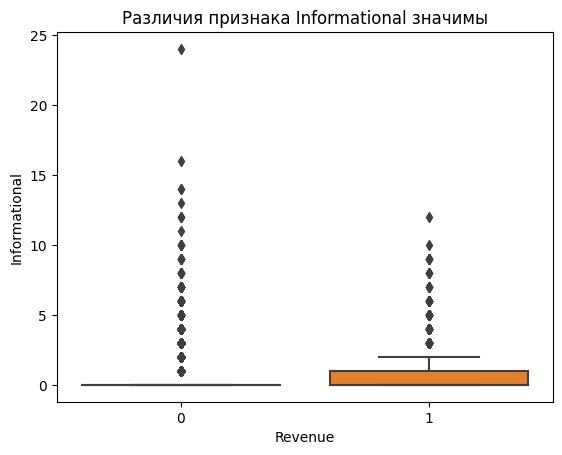

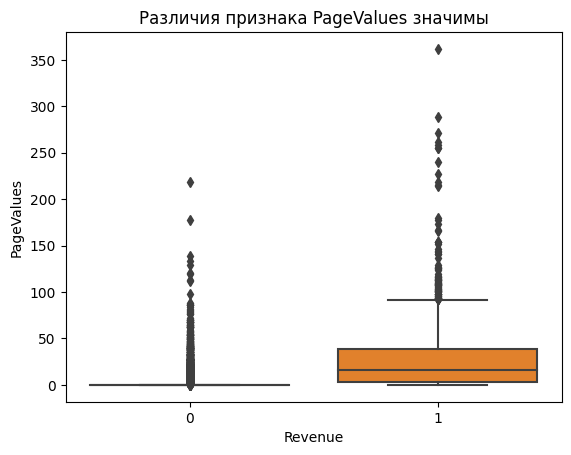

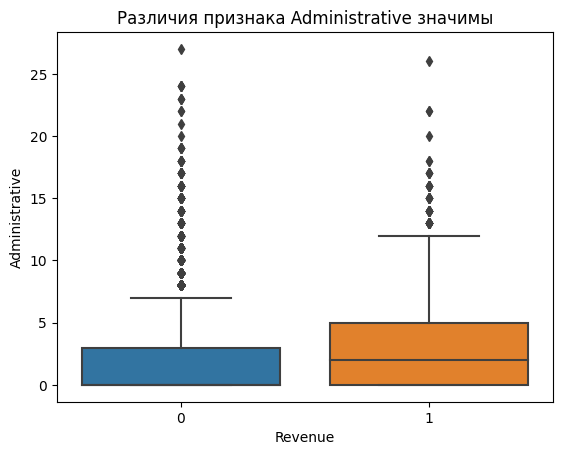

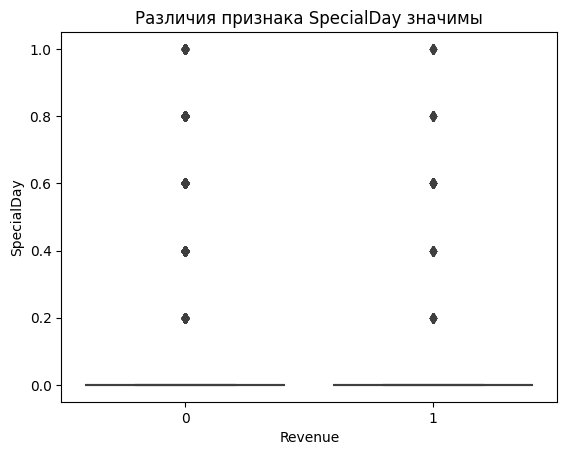

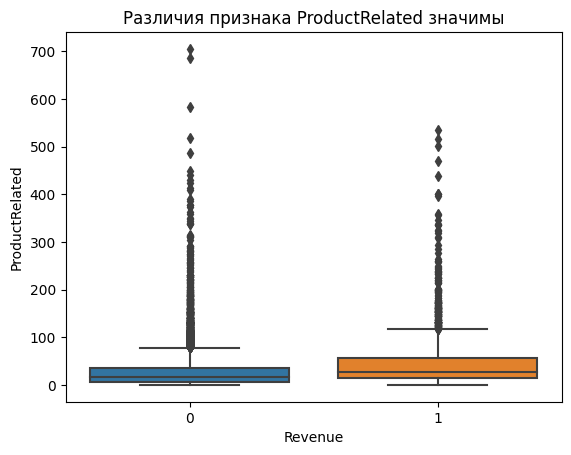

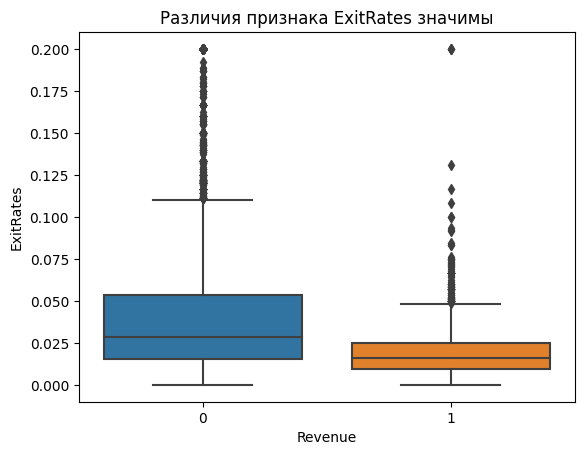

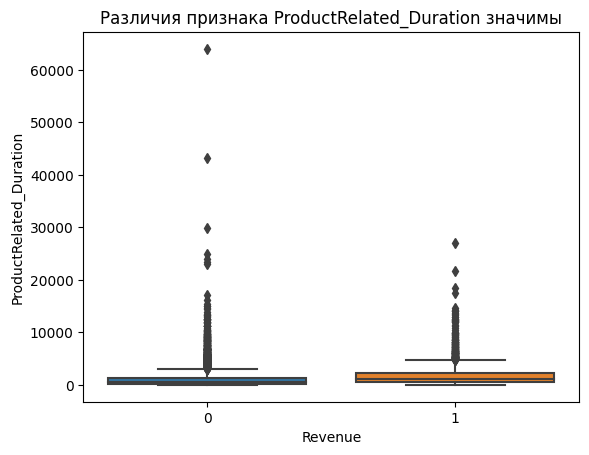

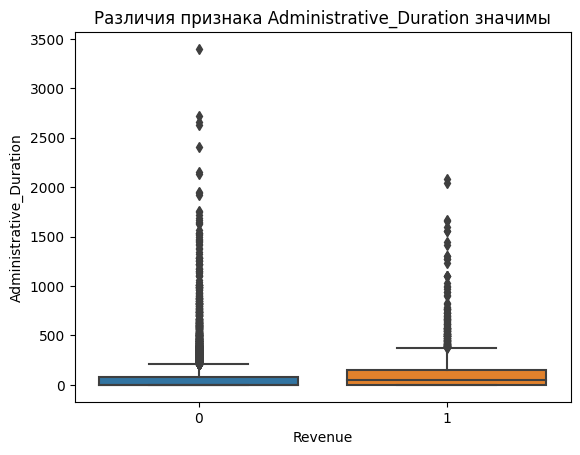

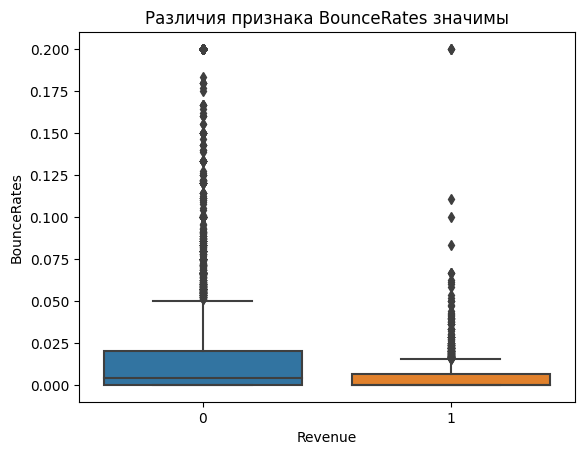

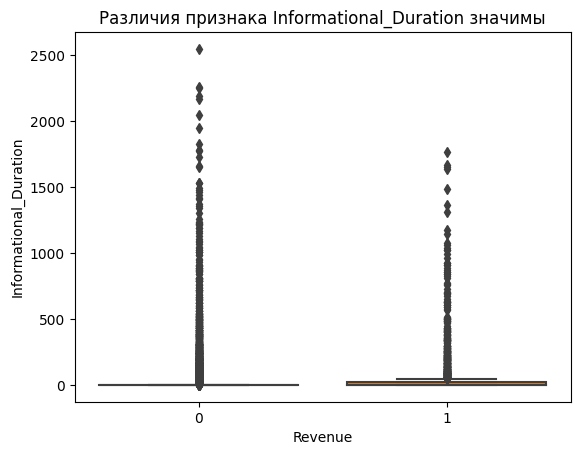

In [ ]:
from scipy.stats import mannwhitneyu

df_group1 = df.query('Revenue == 0')
df_group2 = df.query('Revenue == 1')

title = None

for i in continuous_feutures:

  mw_test_st, mw_test_pv = mannwhitneyu(x=df_group1[i].sort_values(), y=df_group2[i].sort_values())
  if mw_test_pv < 0.05:
    title = f'Различия признака {i} значимы'
  else:
    title = f'Различия признака {i} НЕ значимы'

  fig = plt.figure()
  sns.boxplot(data=df, x='Revenue', y=i).set_title(title)

  fig.show()

**Conclusions:**

- Significant signs according to the equality test: `ProductRelated`, `Administrative`, `BounceRates`, `Informatinal`, `PageValues`, `Administrative_Duration`, `SprecialDay(?)`.

- `SpecialDay` is analyzed additionally, since there are many zeros in the attribute. \
- `ExitRates(?)` analyze additionally, since visually it still has different averages and spreads.

- It was decided to try to exclude `ExitRates`, `ProductRelated_Duration`, `Informational_Duration`, since they do not pass the significance test, and, in addition, are correlated with `ProductRelated', `Informative'.

****

**Выводы:**

- Значимые признаки согласно тесту на равенство:  `ProductRelated`, `Administrative`, `BounceRates`, `Informatinal`, `PageValues`, `Administrative_Duration`, `SprecialDay(?)`.

- `SpecialDay` проанализировать дополнительно, так как много нулей в признаке. \
- `ExitRates(?)` проанализировать дополнительно, так как он визуально он всё же имеет разные средние и разбросы.  

- Принято решение попробовать исключить `ExitRates`, `ProductRelated_Duration`, `Informational_Duration`, поскольку они не проходят значимости по тесту, и, кроме того, являются скореллированными с `ProductRelated`, `Informational`.

In [ ]:
df_significat = df.drop(['ExitRates', 'ProductRelated_Duration', 'Informational_Duration'], axis=1)

**3.2 Analysis of the influence of nomial features on the target variable.** \
The chi-square criterion is applied to assess the relationship between nominative variables and a dichotomous qualitative variable.

**Анализ влияния номиальных признаков на целевую переменную.** \
Применен критерий хи-квадрат для оценки взаимосвязи между номильными переменными и дихотомической качественной переменной.


In [ ]:
categorical_features

['Revenue',
 'Weekend',
 'VisitorType',
 'TrafficType',
 'Region',
 'Browser',
 'OperatingSystems',
 'Month']

In [ ]:
df['OperatingSystems'].value_counts()

2    6168
1    2445
3    2386
4     452
8      72
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
_, pvalues = chi2(df[categorical_features].dropna(), df.dropna()['Revenue'])

for pvalue, name in zip(pvalues, df[categorical_features].columns):

  if pvalue < 0.05:
    print(f'Номиальные переменные вероятно влияют на целевой признак для переменной {name}')

  else:
    print(f'Номиальные переменные вероятно НЕ влияют на целевой признак для переменной {name}')

Номиальные переменные вероятно влияют на целевой признак для переменной Revenue
Номиальные переменные вероятно влияют на целевой признак для переменной Weekend
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной VisitorType
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной TrafficType
Номиальные переменные вероятно влияют на целевой признак для переменной Region
Номиальные переменные вероятно влияют на целевой признак для переменной Browser
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной OperatingSystems
Номиальные переменные вероятно влияют на целевой признак для переменной Month


Для данной выборки не выявлено статистической значимости для признаков `TrafficType`, `VisitorType`, `OperatingSystems`. Уберем эти признаки из данных и продолжим работать с 14ю признаками.

In [ ]:
df_significat = df_significat.drop(['TrafficType', 'VisitorType', 'OperatingSystems'], axis=1)
df_significat.shape

(11555, 12)

## **EDA results**
- During the intelligence analysis, many signs were reduced to 11, instead of 17.
- In the initial data set, the highest percentage of omissions was 4%. It was decided to remove omissions from the data set, including when analyzing the relationships of nomial variables. In a real task, it would be necessary to clarify whether we can eliminate these signs, or it is more reliable to exclude them.
- It was noticed that the data on the number of pages visited and the duration of stay on the pages are monotonously linked, which means that the future model may not need to absorb redundant information.

**Further work**
- Evaluate the relevance of feature removal by training two algorithms on the set of all and a subset of some features.
- For the model, it is planned to evaluate the impact of adding categorical features on the quality of `TrafficType`, `VisitorType`, `OperatingSystems'.
- Also, during the training of the model, it is planned to assess the need to clean the data set from anomalies. With one

During the training of the model, it is also planned to assess the need to clean the data set from anomalies. On the one hand, to keep anomalies in a good tone, since they are not excluded in the actual operation of the model. On the other hand, the preservation of anomalies may somewhat worsen the generalizing abilities of the future model.

****

**Результаты EDA**
- В ходе разведовательного анализа множество признаков было сведено к 11-ти, вместо 17ти.
- В изначальном наборе данных наибольший процент пропусков составлял 4%. Принято решение удалить пропуски из набора данных, в том числе при анализе взаимосвязей номиальных переменных. В реальной задаче было бы необходимо уточнение — можем ли мы занулить эти признаки, или их надежнее исключить.
- Было замечено, что перемнные о количестве посещенных страниц и длительности пребывания на страницах связаны монотонно, что значит, что в будущую модель может можно не вбирать избыточную информацию.

**Дальнейший анализ и планируемая работа**
- Оценить релевантность удаления признаков путем обучения двух алгоритмов на множестве всех и подмножестве некоторых признаков.
- Для модели планируется оценить влияние добавления категориальынх признаков на качество `TrafficType`, `VisitorType`, `OperatingSystems`.
- Также в ходе обучения модели планируется оценить необходимость чистки набора данных от аномалий. С одной стороны, сохранить аномалии хороший тон, поскольку они не исключены при реальной работе модели. С другой — сохранение аномалий может несколько ухудшить обобщающие способности будущей модели.

В ходе обучения модели также планируется оценить необходимость чистки набора данных от аномалий. С одной стороны, сохранить аномалии хороший тон, поскольку они не исключены при реальной работе модели. С другой — сохранение аномалий может несколько ухудшить обобщающие способности будущей модели.